In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 데이터 불러오기
df = pd.read_csv("C:\\Users\\axhtl\\OneDrive\\바탕 화면\\학교\\인공지능개론\\diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [2]:
# Outcome 컬럼 삭제
X = df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [3]:
# BMI를 레이블로 설정
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [4]:
y = y.values

In [5]:
X = X.values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [8]:
import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [9]:
from torch.utils.data import TensorDataset, DataLoader

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614]),
 torch.Size([154]))

In [11]:
import torch.nn as nn
import torch.optim as optim

class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1) # 회귀이므로 출력은 1
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

In [12]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Variables to store loss and accuracy
train_losses = []
test_losses = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float()) 

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {avg_test_loss:.4f}")

print("Training complete.")

Epoch 1/20, Train Loss: 217.5652, Test Loss: 85.7577
Epoch 2/20, Train Loss: 70.6836, Test Loss: 58.6305
Epoch 3/20, Train Loss: 51.3648, Test Loss: 47.6694
Epoch 4/20, Train Loss: 45.4962, Test Loss: 39.4116
Epoch 5/20, Train Loss: 37.0569, Test Loss: 32.7354
Epoch 6/20, Train Loss: 30.5133, Test Loss: 30.2259
Epoch 7/20, Train Loss: 27.7361, Test Loss: 25.8854
Epoch 8/20, Train Loss: 22.6462, Test Loss: 23.6558
Epoch 9/20, Train Loss: 19.4306, Test Loss: 18.8661
Epoch 10/20, Train Loss: 16.1137, Test Loss: 15.0866
Epoch 11/20, Train Loss: 13.4157, Test Loss: 12.0621
Epoch 12/20, Train Loss: 9.3583, Test Loss: 9.1284
Epoch 13/20, Train Loss: 6.9083, Test Loss: 7.3879
Epoch 14/20, Train Loss: 4.5901, Test Loss: 5.7566
Epoch 15/20, Train Loss: 3.1315, Test Loss: 3.5777
Epoch 16/20, Train Loss: 2.2946, Test Loss: 2.9033
Epoch 17/20, Train Loss: 2.2131, Test Loss: 2.4716
Epoch 18/20, Train Loss: 1.7115, Test Loss: 2.2491
Epoch 19/20, Train Loss: 1.5171, Test Loss: 1.6638
Epoch 20/20, Trai

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(outputs.squeeze().cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate MSE
mse = mean_squared_error(all_labels, all_predictions)

print(f'MSE: {mse:.4f}')

MSE: 1.7044


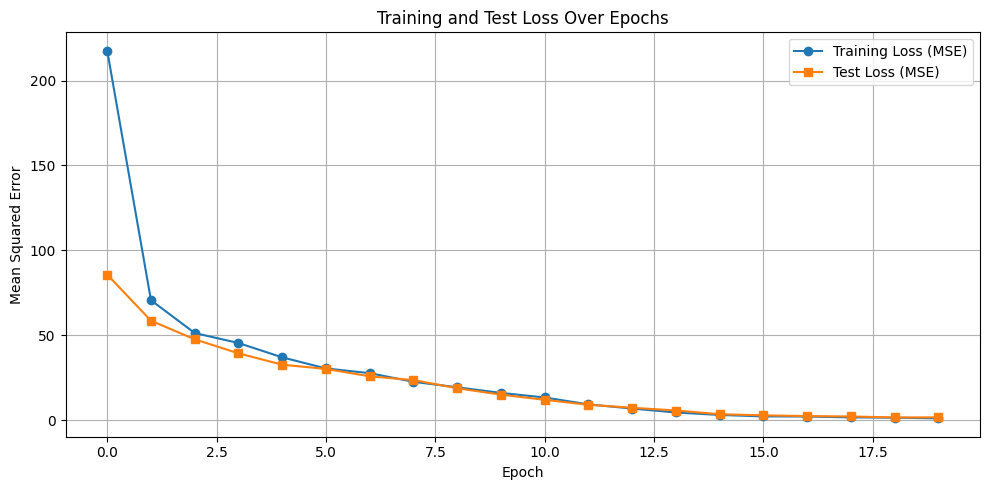

In [15]:
import matplotlib.pyplot as plt

# Plot the training and test loss (MSE)
plt.figure(figsize=(10, 5))

plt.plot(train_losses, label='Training Loss (MSE)', marker='o')
plt.plot(test_losses, label='Test Loss (MSE)', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()